In [263]:
import numpy as np
import matplotlib.pyplot as plt

In [264]:
class Point:
    def __init__(self, X, c, q):
        self.X = X
        self.c = c
        self.q = q
        self.marker = 'o'
        self.alpha = 0.7
    
    def newq(self, q):
        self.q = q
    
    def plot2D(self):
        plt.scatter(self.X[0], self.X[1], marker=self.marker, s=70, c=self.c, lw=2, edgecolors=self.q, alpha=self.alpha)

class Cluster:
    def __init__(self, X, q):
        self.mass = []
        self.q = q
        self.sigma = 1.0
        self.Center = Point(X, q, q)
        self.Center.marker = 'v'
        self.Center.alpha = 1
    
    def a(self, P):
        P.q = self.q
        self.mass.append(P)
        
    def mean(self):
        summ = 0.0
        for i in range(len(self.mass)):
            summ += (self.mass[i].X)
        self.Center.X = summ/len(self.mass)      

    def dispersion(self):
        summ = 0.0
        for i in range(len(self.mass)):
            summ += (self.Center.X - self.mass[i].X).dot((self.Center.X - self.mass[i].X).T)
            self.sigma = np.sqrt(summ/len(self.mass))

    def plot2D(self):
        for i in range(len(self.mass)):
            self.mass[i].plot2D()

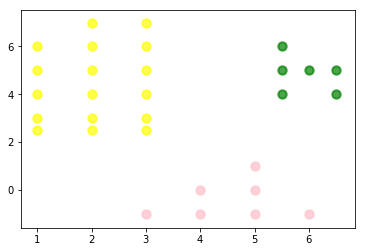

In [265]:
P1 = Point(np.array([1, 2.5]), 'yellow', 'yellow')
P2 = Point(np.array([1, 3]), 'yellow', 'yellow')
P3 = Point(np.array([1, 4]), 'yellow', 'yellow')
P4 = Point(np.array([2, 2.5]), 'yellow', 'yellow')
P5 = Point(np.array([2, 3]), 'yellow', 'yellow')
P6 = Point(np.array([2, 4]), 'yellow', 'yellow')
P7 = Point(np.array([3, 2.5]), 'yellow', 'yellow')
P8 = Point(np.array([3, 3]), 'yellow', 'yellow')
P9 = Point(np.array([3, 4]), 'yellow', 'yellow')
P22 = Point(np.array([1, 5]), 'yellow', 'yellow')
P23 = Point(np.array([1, 6]), 'yellow', 'yellow')
P24 = Point(np.array([2, 5]), 'yellow', 'yellow')
P25 = Point(np.array([2, 6]), 'yellow', 'yellow')
P26 = Point(np.array([2, 7]), 'yellow', 'yellow')
P27 = Point(np.array([3, 5]), 'yellow', 'yellow')
P28 = Point(np.array([3, 6]), 'yellow', 'yellow')
P29 = Point(np.array([3, 7]), 'yellow', 'yellow')
P10 = Point(np.array([6, 5]), 'green', 'green')
P11 = Point(np.array([5.5, 6]), 'green', 'green')
P12 = Point(np.array([5.5, 5]), 'green', 'green')
P19 = Point(np.array([6.5, 4]), 'green', 'green')
P20 = Point(np.array([5.5, 4]), 'green', 'green')
P21 = Point(np.array([6.5, 5]), 'green', 'green')
P13 = Point(np.array([6, -1]), 'pink', 'pink')
P14 = Point(np.array([4, 0]), 'pink', 'pink')
P15 = Point(np.array([5, 1]), 'pink', 'pink')
P16 = Point(np.array([4, -1]), 'pink', 'pink')
P17 = Point(np.array([3, -1]), 'pink', 'pink')
P18 = Point(np.array([5, 0]), 'pink', 'pink')
P30 = Point(np.array([5, -1]), 'pink', 'pink')
red_Points = Cluster(P1.X, 'yellow')
green_Points = Cluster(P10.X, 'green')
blue_Points = Cluster(P13.X, 'pink')
red_Points.a(P1)
red_Points.a(P2)
red_Points.a(P3)
red_Points.a(P4)
red_Points.a(P5)
red_Points.a(P6)
red_Points.a(P7)
red_Points.a(P8)
red_Points.a(P9)
red_Points.a(P22)
red_Points.a(P23)
red_Points.a(P24)
red_Points.a(P25)
red_Points.a(P26)
red_Points.a(P27)
red_Points.a(P28)
red_Points.a(P29)
green_Points.a(P10)
green_Points.a(P11)
green_Points.a(P12)
green_Points.a(P19)
green_Points.a(P20)
green_Points.a(P21)
blue_Points.a(P13)
blue_Points.a(P14)
blue_Points.a(P15)
blue_Points.a(P16)
blue_Points.a(P17)
blue_Points.a(P18)
blue_Points.a(P30)
red_Points.plot2D()
green_Points.plot2D()
blue_Points.plot2D()
plt.show()

In [269]:
#создание массива точек
mass_all=[P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P30]

In [270]:
#расстояние между двумя точками
def dPP(P1, P2):
    return np.sqrt((P1.X - P2.X).dot((P1.X - P2.X).T))

In [271]:
#расстояние между центром кластера и точками, строка значений
def dCm(Cluster, mass_of_Points, x):
    mass = []
    if (x==1):
        for i in range(len(mass_of_Points)):
            mass.append(dPP(Cluster.Center, mass_of_Points[i])/1)
    else:
        for i in range(len(mass_of_Points)):
            mass.append(dPP(Cluster.Center, mass_of_Points[i])/Cluster.sigma)
    return mass

In [272]:
#поиск минимального расстояния в столбце, для определения принадлежности точки к кластеру
def find_min_in_column(matrix):
    mass = []
    for i in range(len(matrix[0])):
        element = matrix[0][i]
        index = 0
        for j in range(len(matrix)):
            if (element >= matrix[j][i]):
                element = matrix[j][i]
                index = j
        mass.append(index)
    return mass

In [273]:
#выбор центров кластеров на первом шаге
#поиск минимального расстояния между центрами кластеров и точкой
def get_distances(Centers, P):
    mass = []
    for i in range(len(Centers)):
        mass.append(dPP(Centers[i], P))
    return min(mass)

In [274]:
#выбор центров кластеров на первом шаге
#максимизация минимального расстояния между центрами кластеров и точкой
import random
def find_max_min(mass_of_Points, number_of_centers):
    init_index = random.sample(range(len(mass_of_Points)), 1)[0]
    index = 0
    Centers = []
    indexes = []
    indexes.append(init_index)
    Centers.append(mass_of_Points[init_index])
    for j in range(1, number_of_centers):
        maxx = 0
        for i in range(len(mass_of_Points)):
            if (get_distances(Centers, mass_of_Points[i]) > maxx):
                maxx = get_distances(Centers, mass_of_Points[i])
                index = i
        Centers.append(mass_of_Points[index])
        indexes.append(index)    
    return indexes

In [275]:
#распределение точек по кластерам, x=1 без учета СКО, x=0 с учетом СКО
def clusterisation(Clusters, mass_of_Points, x):
    matrix = []
    for i in range(len(Clusters)):
        matrix.append(dCm(Clusters[i], mass_of_Points, x))
    cl_nums = find_min_in_column(matrix)
    for i in range(len(Clusters)):
        Clusters[i].mass = []
    for i in range(len(cl_nums)):
        Clusters[cl_nums[i]].a(mass_of_Points[i])
    for i in range(len(Clusters)):
        Clusters[i].mean()
        Clusters[i].dispersion()


In [279]:
#KMeans
import _pickle as cPickle
FILE_FOR_MODEL = "Clusters.txt"
def KMeans(number_of_clusters, mass, iterations, warm_start):
    if (warm_start == False):
        #определение центров кластеров
        center_names = find_max_min(mass, number_of_clusters)
        print('initial cluster centers:', center_names)
        Clusters = []
        sigmas_old = 0
        cluster_colors = ['purple', 'blue', 'red']
        #создание кластеров с заданными центрами
        for i in range(number_of_clusters):
            Clusters.append(Cluster(mass[center_names[i]].X, cluster_colors[i]))
            sigmas_old += Clusters[i].sigma
            #отрисовка центров кластеров на начальном шаге
            Clusters[i].Center.plot2D()
        #распределение точек по кластерам
        clusterisation(Clusters, mass_all, 0)
        sigmas_new = 0
        #отрисовка кластеров
        for i in range(len(Clusters)):
            Clusters[i].plot2D()
            sigmas_new += Clusters[i].sigma
        print('iteration: 0')
        plt.show()
    else:
        file = open(FILE_FOR_MODEL, 'rb')
        [Clusters, sigmas_old, sigmas_new] = cPickle.load(file)
        file.close()
    k = 0
    while(k <= iterations):
        #распределение точек по кластерам
        clusterisation(Clusters, mass_all, 0)
        sigmas_old = sigmas_new
        sigmas_new = 0
        for i in range(len(Clusters)):
            sigmas_new += Clusters[i].sigma
        k += 1
        #выход из цикла при условии, что суммарное СКО не изменяется
        if (sigmas_old == sigmas_new):
            break
        print('iteration:', k, 'sum of sigmas:', sigmas_new)
    file = open(FILE_FOR_MODEL, 'wb')
    cPickle.dump([Clusters, sigmas_old, sigmas_new], file)
    file.close()
    print('train results saved in:', FILE_FOR_MODEL)
    #отрисовка кластеров и их центров
    for i in range(len(Clusters)):
        Clusters[i].plot2D()
        Clusters[i].Center.plot2D()
    plt.show()

initial cluster centers: [15, 25, 18]
iteration: 0


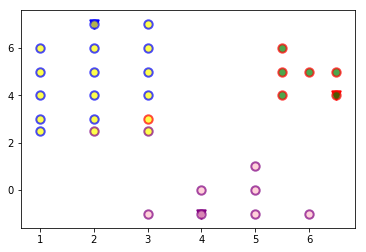

iteration: 1 sum of sigmas: 4.05082263228
iteration: 2 sum of sigmas: 3.70284572706
train results saved in: Clusters.txt


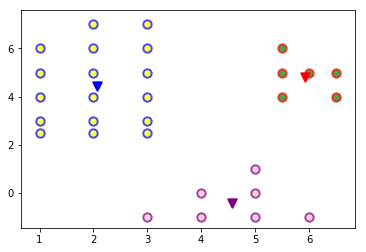

In [281]:
KMeans(number_of_clusters=3, mass=mass_all, iterations=100, warm_start=False)